In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_mo_energy_levels_tight_binding(n_atoms, interaction_strength=-1.0):
    """Calculate MO energy levels using tight binding model
    
    This is a simplified model that demonstrates
    similar energy level patterns for a linear chain of atoms
    """
    # Atomic orbital energy (arbitrary zero)
    alpha = 0
    # Interaction strength (negative for bonding)
    beta = interaction_strength
    
    if n_atoms == 1:
        # For a single atom, just return the atomic orbital energy
        return np.array([alpha])
    
    # Calculate energies using tight binding model
    k_values = np.arange(1, n_atoms+1)
    energies = alpha + 2*beta*np.cos(k_values*np.pi/(n_atoms+1))
    
    # Sort energies from lowest to highest (like in quantum chemistry output)
    energies = np.sort(energies)
    
    return energies

def plot_mo_diagram(mo_energies_list, atom_counts):
    """Plot MO diagram showing evolution with increasing atom count"""
    plt.figure(figsize=(10, 8))
    
    for i, (mo_energies, n_atoms) in enumerate(zip(mo_energies_list, atom_counts)):
        x_positions = np.ones(len(mo_energies)) * i
        plt.scatter(x_positions, mo_energies, marker='_', s=500, 
                    color='blue', linewidth=2)
    
    plt.xticks(range(len(atom_counts)), [f"{n} atoms" for n in atom_counts])
    plt.ylabel("Energy (arbitrary units)")
    plt.title("Evolution of MO Energy Levels with Increasing Number of Atoms")
    plt.grid(True, alpha=0.3, axis='y')
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    plt.show()

def visualize_molecular_orbitals_schematic(n_atoms=4, selected_orbitals=None):
    """Generate schematic visualization of molecular orbitals
    
    This creates simple schematic visualizations of the wavefunction
    patterns in a linear chain
    """
    if selected_orbitals is None:
        selected_orbitals = list(range(n_atoms))
    
    fig, axes = plt.subplots(len(selected_orbitals), 1, figsize=(8, 2*len(selected_orbitals)))
    
    if len(selected_orbitals) == 1:
        axes = [axes]
    
    # Extend the range beyond the atoms to show full wavefunction
    x = np.linspace(-1, n_atoms, 200)
    
    for i, orbital_idx in enumerate(selected_orbitals):
        # The pattern for the nth molecular orbital in a linear chain
        # is approximated by a standing wave with n nodes
        n = orbital_idx + 1
        k = n * np.pi / (n_atoms + 1)
        psi = np.sin(k * (x + 1))
        
        # Plot the wavefunction
        axes[i].plot(x, psi, 'b-')
        axes[i].plot(x, -psi, 'b-')
        axes[i].fill_between(x, psi, 0, where=(psi>0), color='blue', alpha=0.3)
        axes[i].fill_between(x, psi, 0, where=(psi<0), color='blue', alpha=0.3)
        
        # Add atom positions
        atom_positions = np.arange(n_atoms)
        axes[i].plot(atom_positions, np.zeros_like(atom_positions), 'ko', ms=10)
        
        # Add orbital energy in a box
        energy = 2 * (-1.0) * np.cos(k)
        energy_text = f"E = {energy:.2f}"
        axes[i].text(n_atoms+0.3, 0, energy_text, va='center',
                  bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
        
        # Label as bonding or antibonding
        if orbital_idx < n_atoms/2:
            bond_type = "Bonding"
        else:
            bond_type = "Antibonding"
        
        axes[i].set_title(f"Molecular Orbital #{orbital_idx+1} ({bond_type})")
        axes[i].set_ylim(-1.5, 1.5)
        axes[i].set_xlim(-1, n_atoms+1)  # Extended range
        axes[i].set_yticks([])
        axes[i].set_xticks(atom_positions)
        axes[i].set_xticklabels([f"Atom {j+1}" for j in range(n_atoms)])
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Calculated energy levels for 1 atoms
Calculated energy levels for 2 atoms
Calculated energy levels for 4 atoms
Calculated energy levels for 8 atoms
Calculated energy levels for 16 atoms


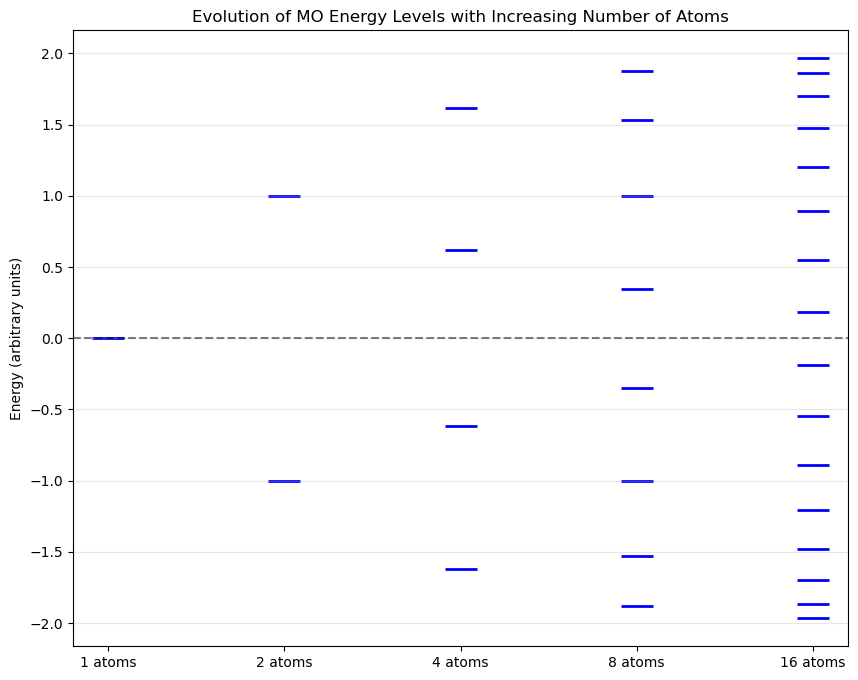

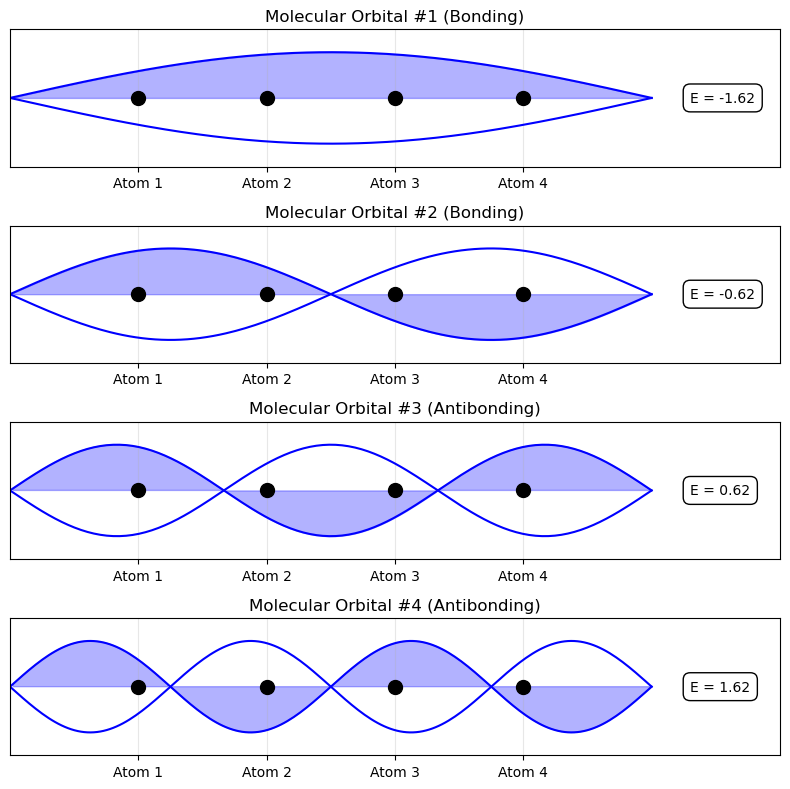

In [2]:
# Calculate and display MO energy levels for different chain lengths
atom_counts = [1, 2, 4, 8, 16]  # Added the case with 1 atom
mo_energies_list = []

for n_atoms in atom_counts:
    mo_energies = calculate_mo_energy_levels_tight_binding(n_atoms)
    mo_energies_list.append(mo_energies)
    print(f"Calculated energy levels for {n_atoms} atoms")

plot_mo_diagram(mo_energies_list, atom_counts)

# Visualize molecular orbitals schematically for a 4-atom chain
visualize_molecular_orbitals_schematic(n_atoms=4, selected_orbitals=[0, 1, 2, 3])